In [2]:
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [7]:
n_data = torch.ones(100,2)
x0 = torch.normal(2*n_data,1) # 类型0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)  # 类型0 y data (tensor), shape=(100, )
x1 = torch.normal(-2*n_data,1)   # 类型1 x data (tensor), shape=(100, 1)
y1 = torch.ones(100)    # 类型1 y data (tensor), shape=(100, )

x = torch.cat((x0,x1),0).type(torch.FloatTensor)  #(tensor), shape=(200, 2)
y = torch.cat((y0,y1)).type(torch.LongTensor) #(tensor), shape=(200, ) 标签的默认形式

In [8]:
x, y = Variable(x), Variable(y)

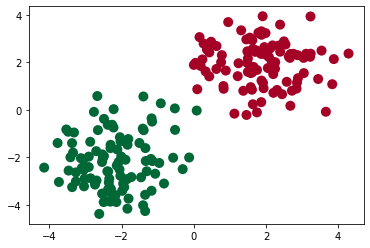

In [9]:
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [13]:
class ClassificationNet(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(ClassificationNet, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [14]:
net = ClassificationNet(n_feature = 2, n_hidden = 10, n_output = 2)
net

ClassificationNet(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=2, bias=True)
)

In [15]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.03)

In [20]:
loss_func = torch.nn.CrossEntropyLoss()

/home/neu/anaconda3/envs/pytorch-env/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  


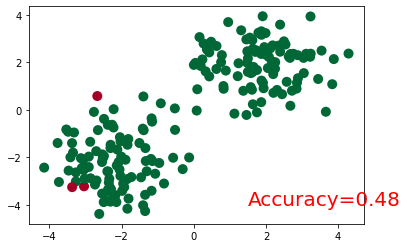

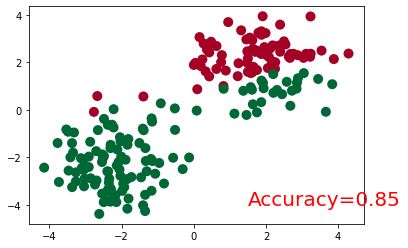

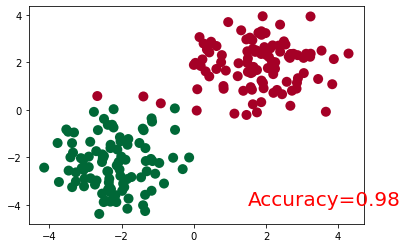

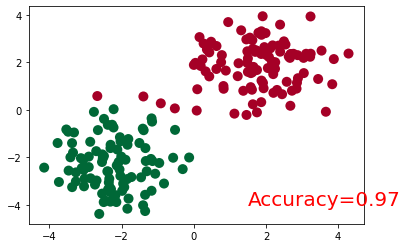

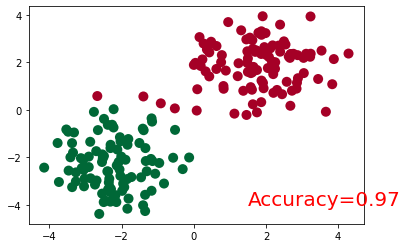

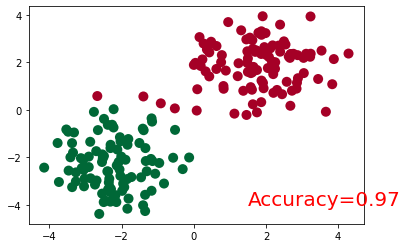

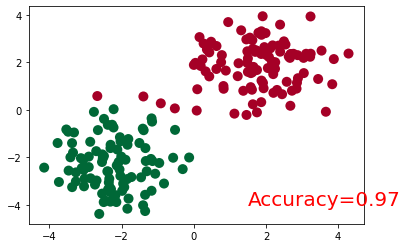

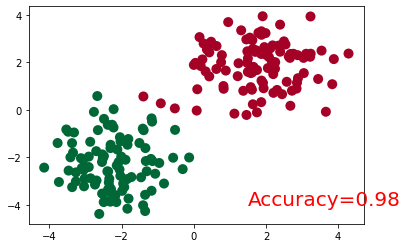

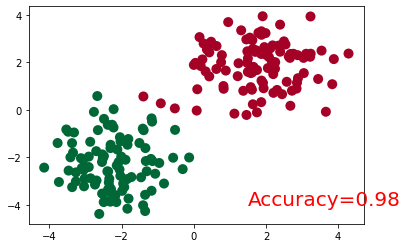

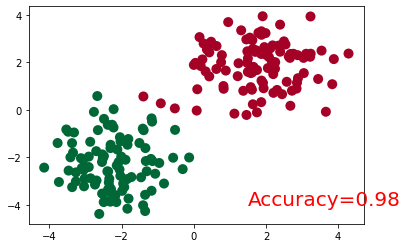

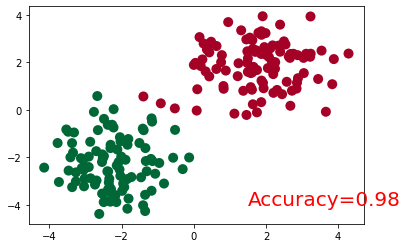

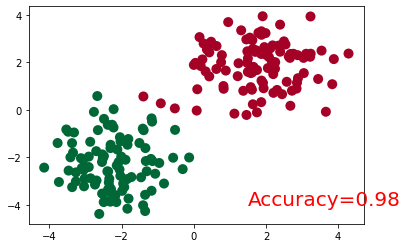

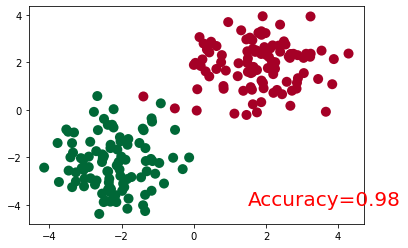

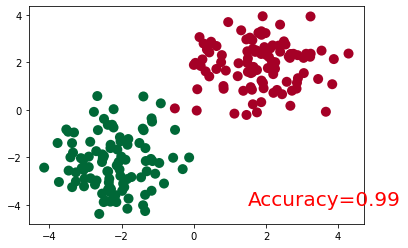

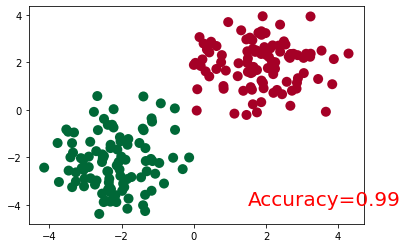

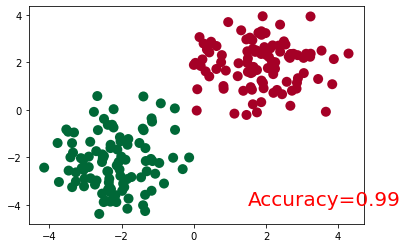

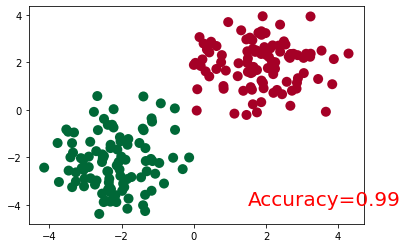

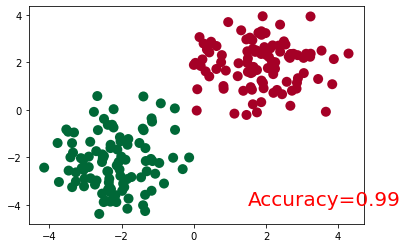

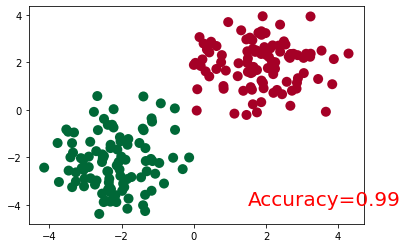

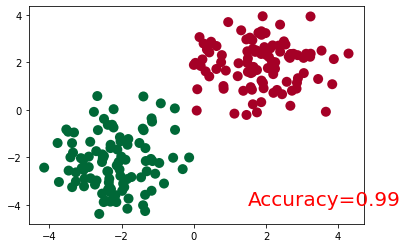

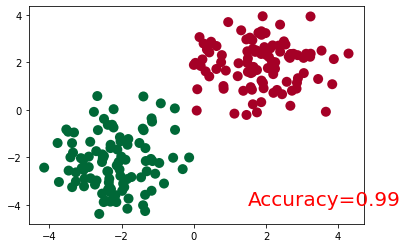

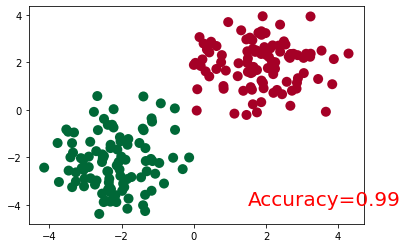

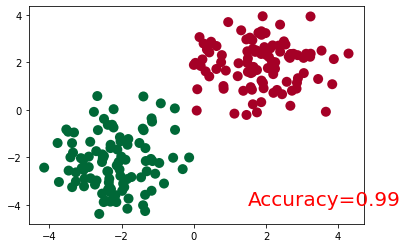

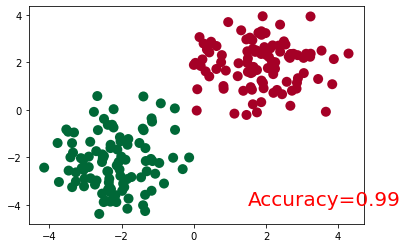

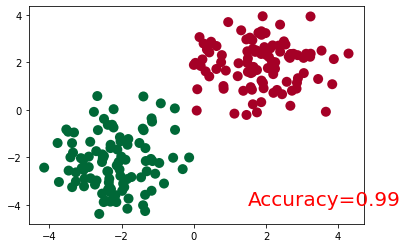

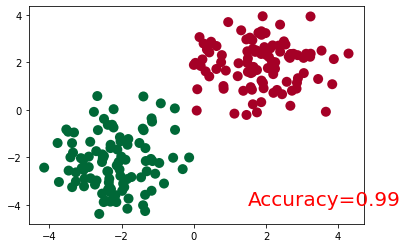

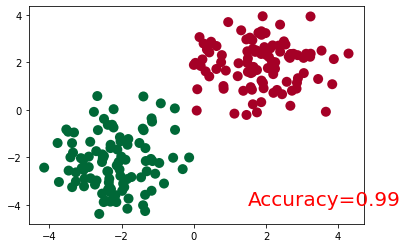

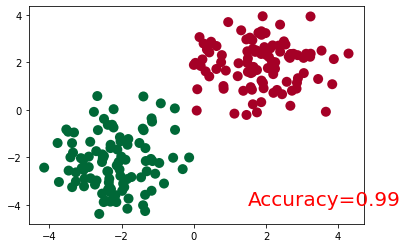

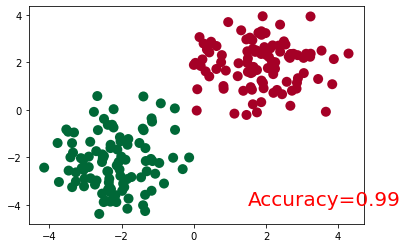

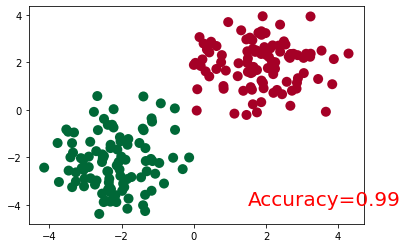

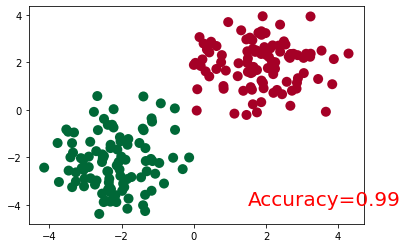

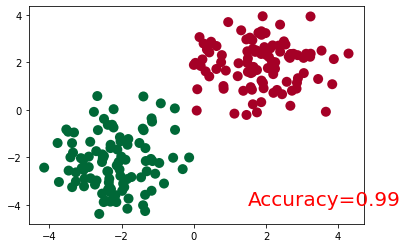

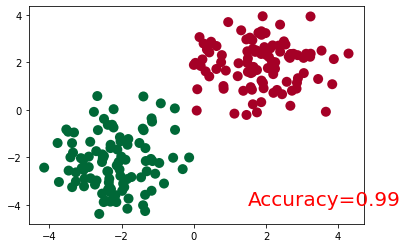

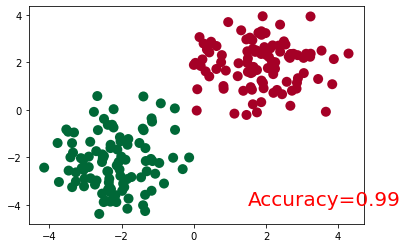

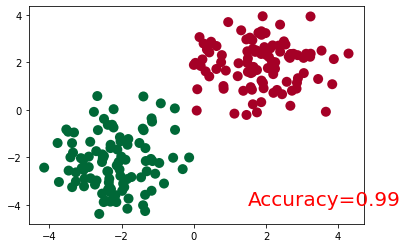

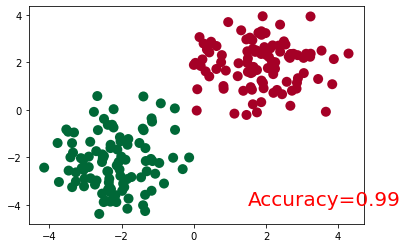

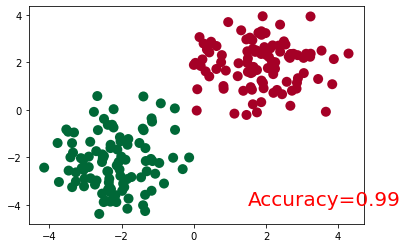

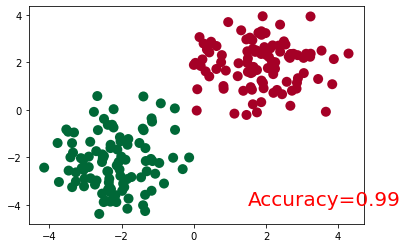

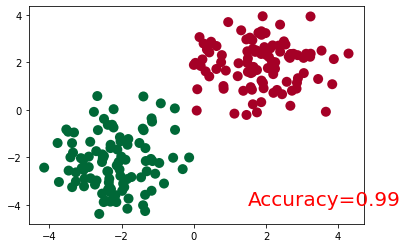

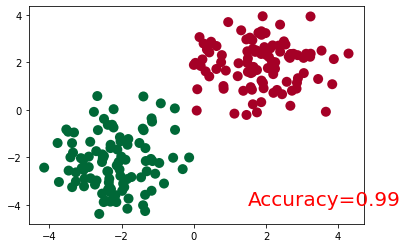

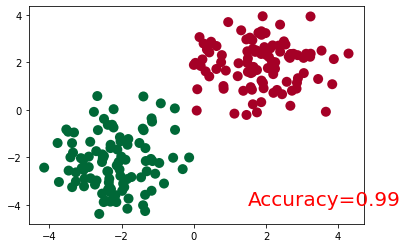

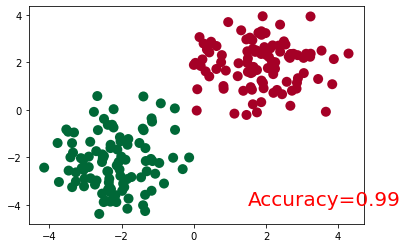

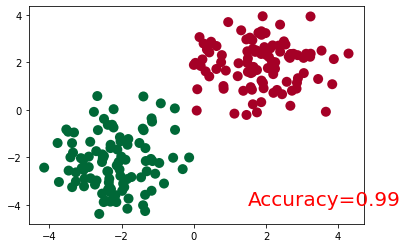

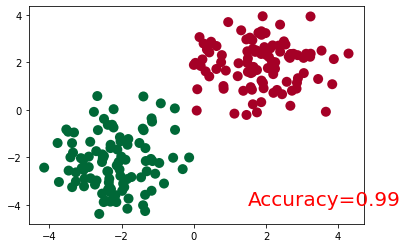

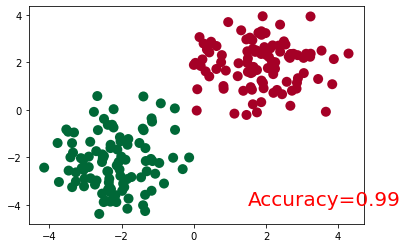

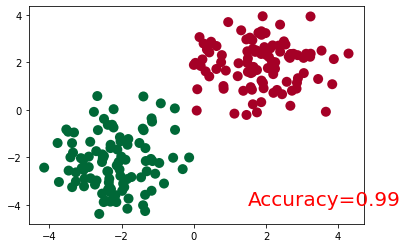

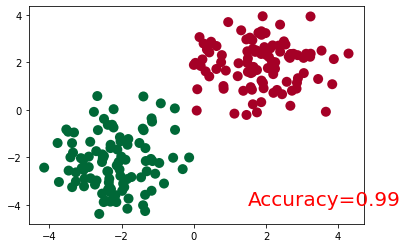

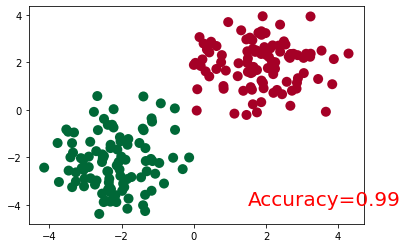

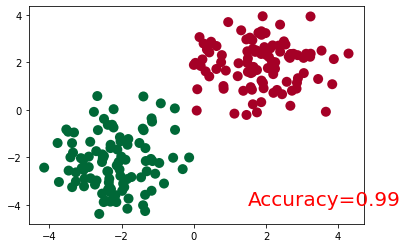

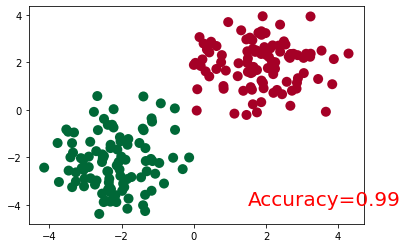

In [22]:
plt.ion()   # 画图
plt.show()

for t in range(100):
    out = net(x)
    loss = loss_func(out, y)
    optimizer.zero_grad() # 清空上一步的残余的梯度
    loss.backward() # 误差反向传播, 计算参数更新值
    optimizer.step() # 将参数更新值施加到 net 的 parameters 上
    
    if t % 2 == 0:
        # plot and show learning process
        plt.cla()
        prediction = torch.max(torch.nn.functional.softmax(out), 1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color': 'red'})
        plt.pause(0.1)

plt.ioff()   # 画图
plt.show()

In [25]:
tensor = torch.rand((1,2))
torch.relu(tensor)

tensor([[0.9096, 0.8210]])